 # <span style="color:green"> DASHBOARD AEROPUERTO BARAJAS, MADRID </span>

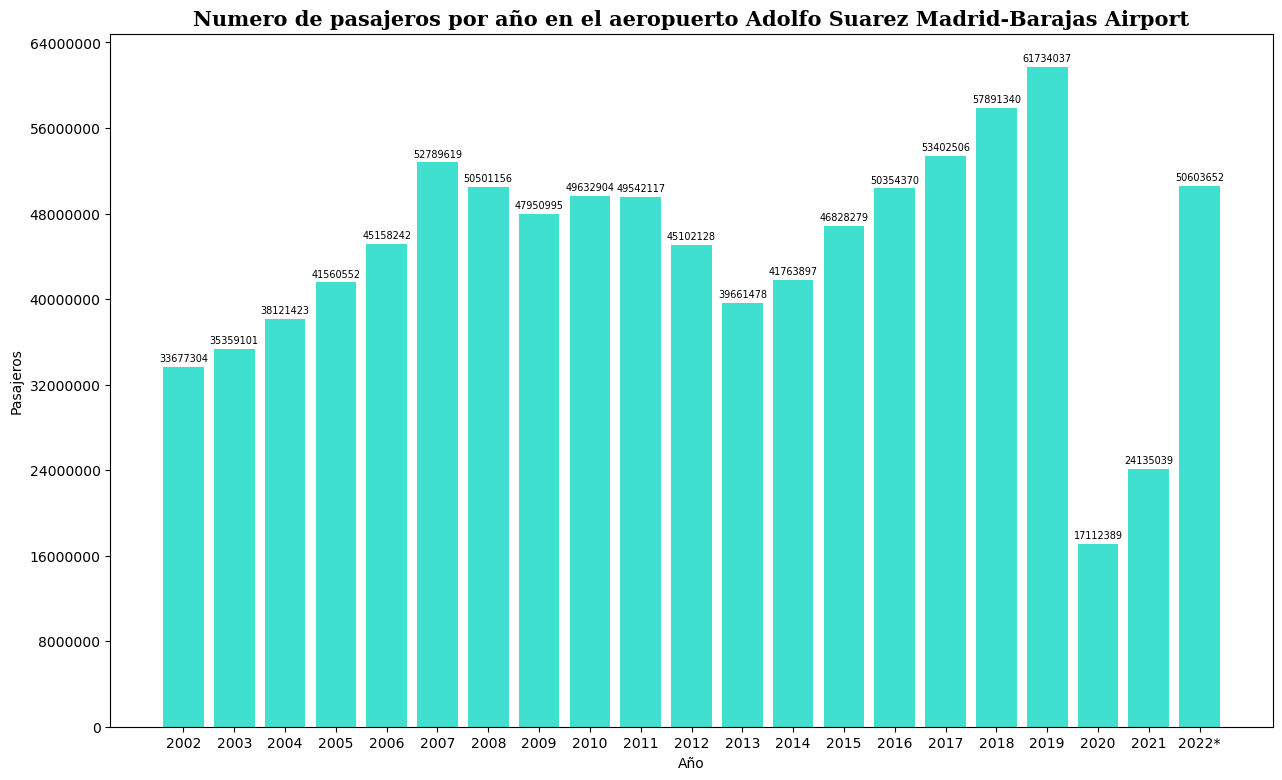

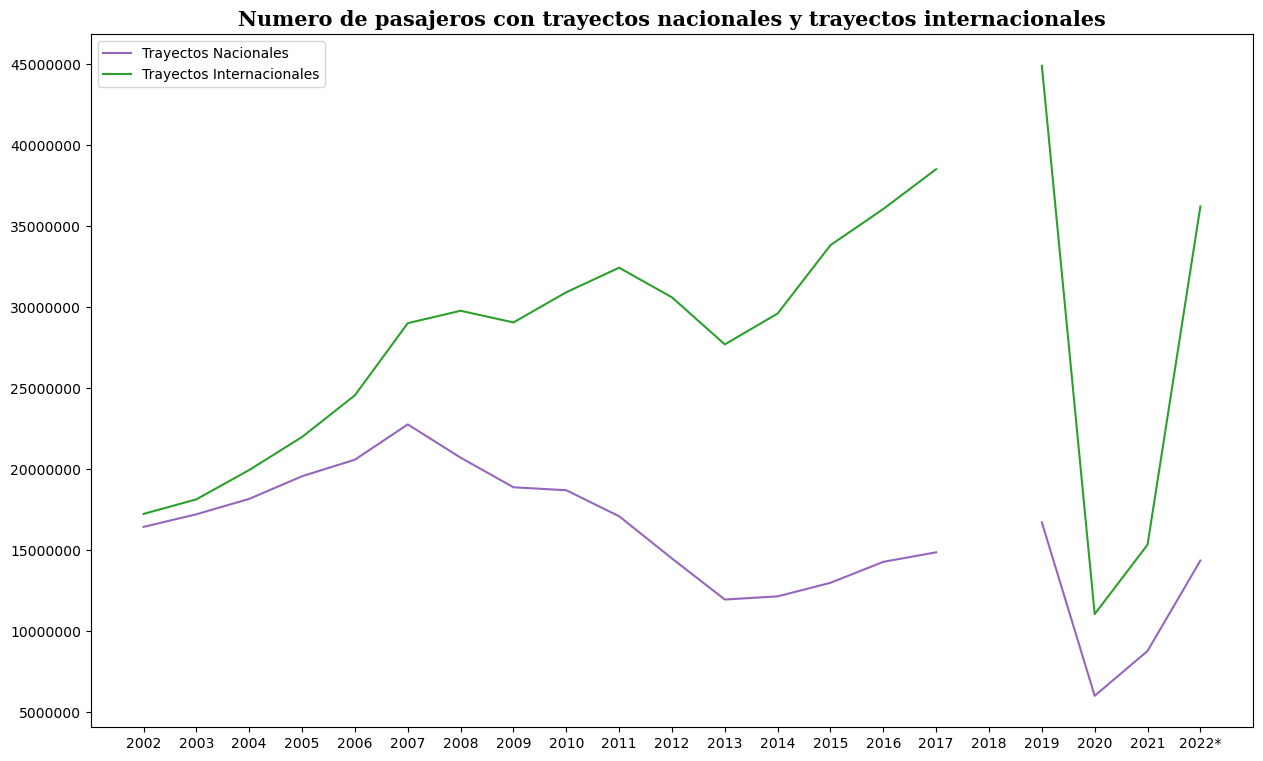

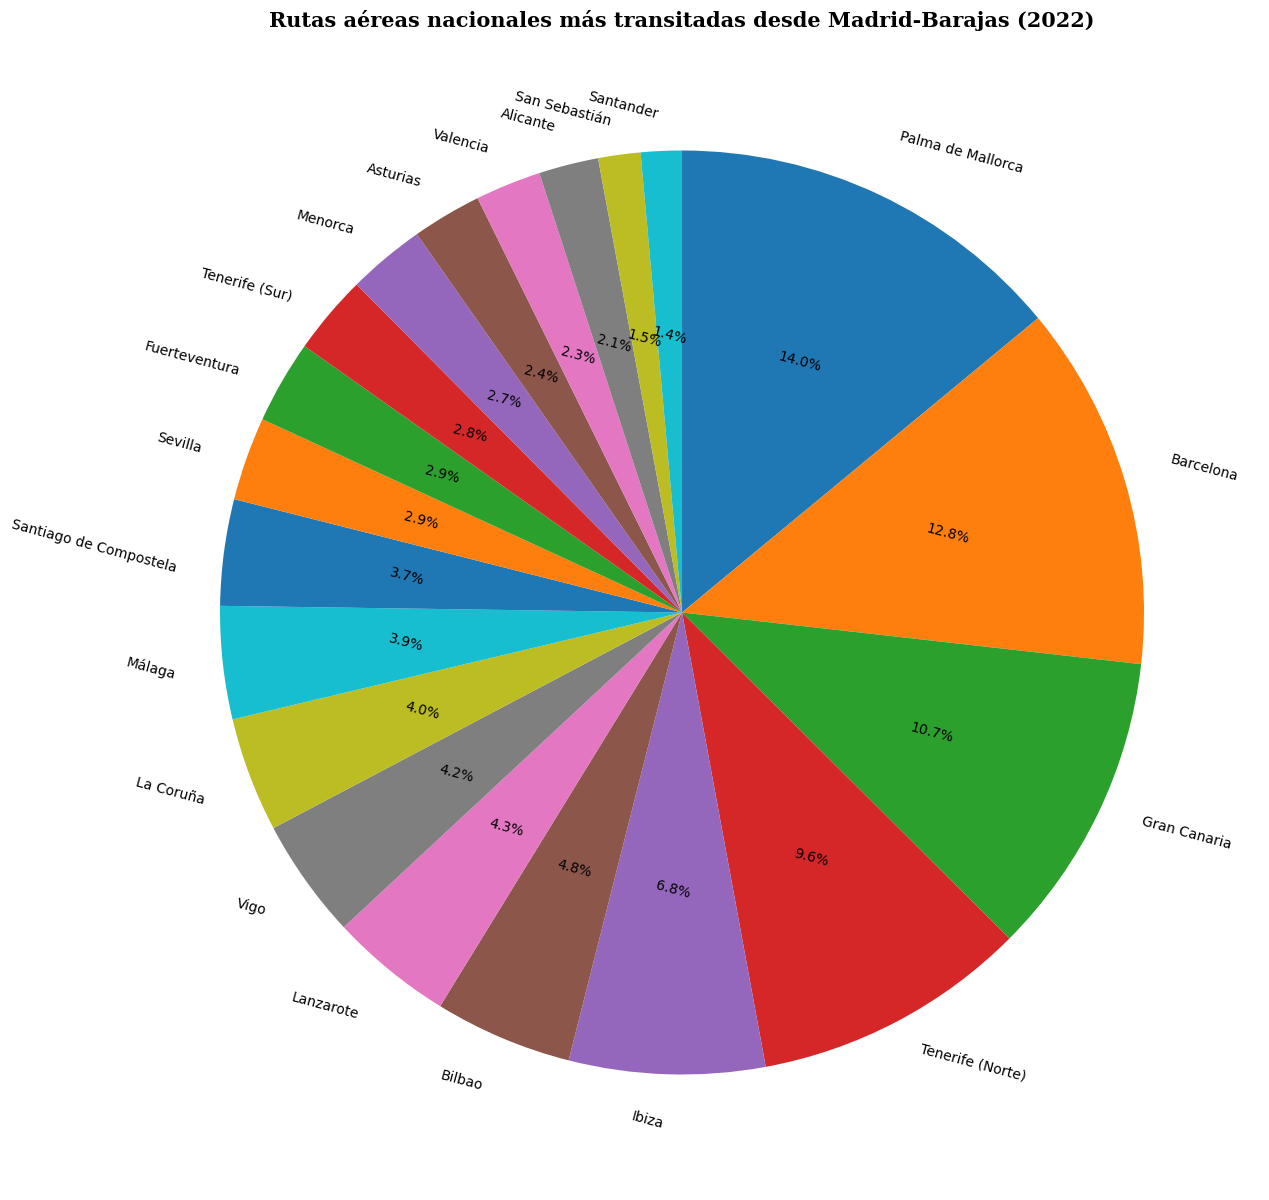

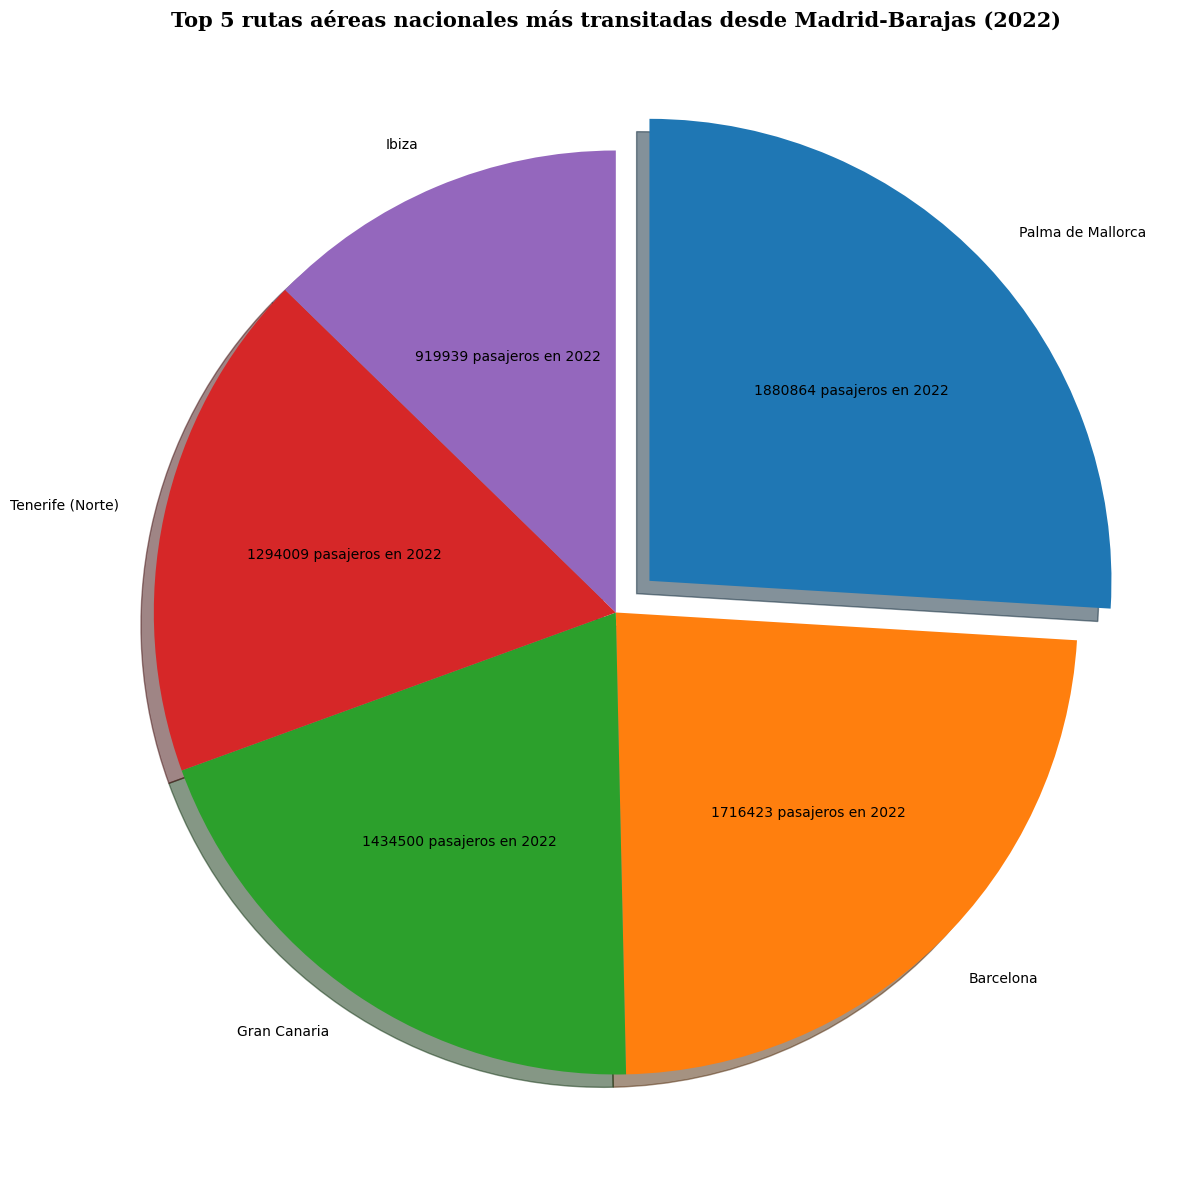

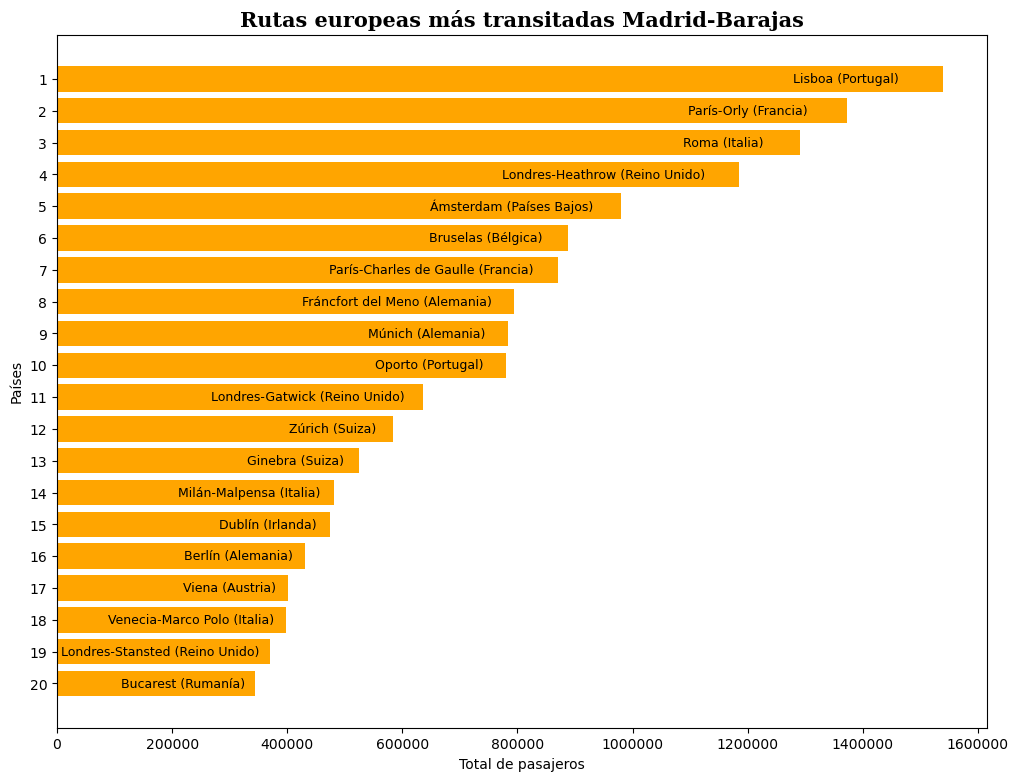

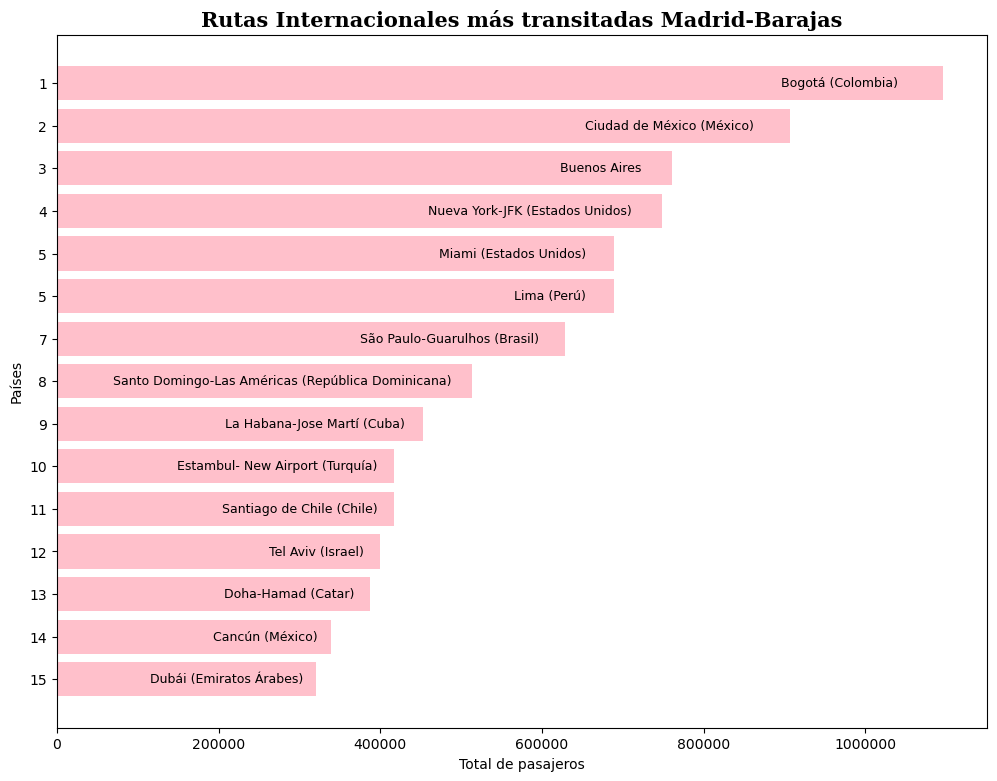

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

#Datos
b = pd.read_html('https://es.wikipedia.org/wiki/Aeropuerto_Adolfo_Su%C3%A1rez_Madrid-Barajas#Estad%C3%ADsticas')

#Transformamos los datos

#Tabla 1
tabla = b[8]
for y in range(4):
    for i in range(len(tabla)):
        try:
            x = str(tabla.iat[i, y]).split()
            p = x[0] + x[1] + x [2]
            tabla.iat[i, y] = int(p)
        except:
            pass
        
#Tabla 2
tabla_2 = b[9]
for y in range(4):
    for i in range(len(tabla_2)):
        try:
            val = int(tabla_2.iat[i, 2].replace(".", "")) 
            tabla_2.iat[i, 2] = val
        except:
            pass

tabla_2 = tabla_2.drop("% Variación 2021", axis=1)  

#Tabla 3
tabla_3 = b[10]
for y in range(4):
    for i in range(len(tabla_3)):
        try:
            val = int(tabla_3.iat[i, 2].replace(".", ""))
            tabla_3.iat[i, 2] = val
        except:
            pass

tabla_3 = tabla_3.drop("%Variación 2021", axis=1)

tabla_4 = b[11]
for y in range(4):
    for i in range(len(tabla_4)):
        try:
            val = int(tabla_4.iat[i, 2].replace(".", ""))
            tabla_4.iat[i, 2] = val
        except:
            pass

tabla_4 = tabla_4.drop("%Variación 2021", axis=1)

#Creamos los gráficos

#Tabla 1. Gráfico 1
agnos = tabla.iloc[:, 0] 
pasajeros = tabla.iloc[:, 1]
plt.figure(figsize=(15, 9))
plt.bar(agnos, pasajeros, width= 0.8, color='turquoise')
plt.xlabel('Año')
plt.ylabel('Pasajeros')
plt.title('Numero de pasajeros por año en el aeropuerto Adolfo Suarez Madrid-Barajas Airport',fontsize=15, fontweight='bold', fontfamily='serif', color='black')
plt.ticklabel_format(style='plain', axis='y')
plt.gca().yaxis.set_major_locator(MaxNLocator(integer=True))
plt.gca().invert_xaxis()
for i, v in enumerate(pasajeros):
    plt.text(i, v+500000, str(v), ha='center', fontsize=7)
plt.show()

#Tabla 1. Gráfico 2
fig, ax = plt.subplots(figsize=(15, 9))
agnos = tabla.iloc[:, 0]
trayectos = {'TrayNacionales': tabla.iloc[:, 2],'TrayInternacionales': tabla.iloc[:, 3]}
ax.plot(agnos, trayectos['TrayNacionales'], color = 'tab:purple', label = 'Trayectos Nacionales')
ax.plot(agnos, trayectos['TrayInternacionales'], color = 'tab:green', label = 'Trayectos Internacionales')
plt.title('Numero de pasajeros con trayectos nacionales y trayectos internacionales',fontsize=15, fontweight='bold', fontfamily='serif', color='black')
ax.legend(loc = 'upper left')
ax.invert_xaxis()
plt.ticklabel_format(style='plain', axis='y')
plt.gca().yaxis.set_major_locator(MaxNLocator(integer=True))
plt.show()

#Tabla 2. Gráfico 1
valores = tabla_2['Pasajeros'].tolist()
etiquetas = tabla_2['Ciudad'].tolist()
plt.figure(figsize=(15, 15))
plt.pie(valores, labels=etiquetas, autopct='%1.1f%%', startangle=90, counterclock=False, textprops={'rotation': -15})
plt.title('Rutas aéreas nacionales más transitadas desde Madrid-Barajas (2022)',fontsize=15, fontweight='bold', fontfamily='serif', color='black')
plt.show()

#Tabla 2. Gráfico 2
valores = tabla_2['Pasajeros'].head(5).tolist()
etiquetas = tabla_2['Ciudad'].head(5).tolist()
explosion = [0] * len(valores)
explosion[0] = 0.1
plt.figure(figsize=(15, 15))
def absolute_values(val):
    a = int(val/100.*sum(valores))
    return "{:d} pasajeros en 2022".format(a)
plt.pie(valores, labels=etiquetas, explode=explosion, autopct=absolute_values, startangle=90, counterclock=False, textprops={'color': 'black', 'fontsize': 10}, shadow= True)
plt.title('Top 5 rutas aéreas nacionales más transitadas desde Madrid-Barajas (2022)',fontsize=15, fontweight='bold', fontfamily='serif', color='black')
plt.show()

#Tabla 3. Gráfico 1
numeros = tabla_3.iloc[:, 0].values
valores = tabla_3.iloc[:, 2].values
paises = tabla_3.iloc[:, 1].values
fig, ax = plt.subplots(figsize=(12, 9))
barras = ax.barh(range(len(numeros)), valores, color='orange')
ax.set_ylim(ax.get_ylim()[::-1])
ax.set_title('Rutas europeas más transitadas Madrid-Barajas',fontsize=15, fontweight='bold', fontfamily='serif', color='black')
ax.set_xlabel('Total de pasajeros')
ax.set_ylabel('Países')
ax.set_yticks(range(len(numeros)))
ax.set_yticklabels(numeros)
for i, barra in enumerate(barras):
    ax.text(barra.get_width() * 0.95, barra.get_y() + barra.get_height() / 2, paises[i], ha='right', va='center', fontsize=9)
plt.ticklabel_format(style='plain', axis='x')
plt.show()

#Tabla 4.Gráfica 1
numeros = tabla_4.iloc[:, 0].values
valores = tabla_4.iloc[:, 2].values
paises = tabla_4.iloc[:, 1].values
fig, ax = plt.subplots(figsize=(12, 9))
barras = ax.barh(range(len(numeros)), valores, color='pink')
ax.set_ylim(ax.get_ylim()[::-1])
ax.set_title('Rutas Internacionales más transitadas Madrid-Barajas',fontsize=15, fontweight='bold', fontfamily='serif', color='black')
ax.set_xlabel('Total de pasajeros')
ax.set_ylabel('Países')
ax.set_yticks(range(len(numeros)))
ax.set_yticklabels(numeros)
for i, barra in enumerate(barras):
    ax.text(barra.get_width() * 0.95, barra.get_y() + barra.get_height() / 2, paises[i], ha='right', va='center', fontsize=9)
plt.ticklabel_format(style='plain', axis='x')
plt.show()
